In [4]:
import pandas as pd
df = pd.read_csv('FinancialData.csv',encoding='ISO-8859-1')


In [5]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [6]:
# checking for any empty cell
df.isnull().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [7]:
# Shape of our dataset
df.shape

(4845, 2)

In [8]:
df_copy = df.copy()
df_copy.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## Distribution of target variable

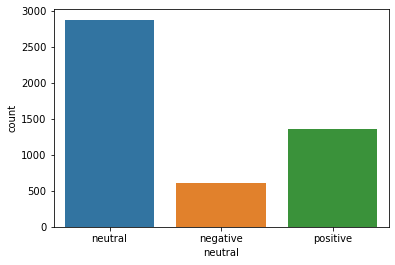

In [9]:
# show the distribution of the labels
import seaborn as sns
sns.countplot(x=df.neutral);

## Observation

From the diagram, it is clear that dataset is not balanced. 

Therefore, while split it into train and test dataset, we will use stratify method.

It is multi class classification problem

## Splitting dataset into Train and Test dataset

In [10]:
X = df.drop('neutral', axis=1)
y = df['neutral']
print("X shape: {} \ny shape: {}".format(X.shape, y.shape))

X shape: (4845, 1) 
y shape: (4845,)


In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=45,stratify=y)
print("train_X shape: {} \ntrain_y shape: {}".format(train_X.shape, train_y.shape))
print("test_X shape: {} \ntest_y shape: {}".format(test_X.shape, test_y.shape))

train_X shape: (3876, 1) 
train_y shape: (3876,)
test_X shape: (969, 1) 
test_y shape: (969,)


## Encoding target variable

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['neutral'] = le.fit_transform(df['neutral'])
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...
2,2,With the new production plant the company woul...
3,2,According to the company 's updated strategy f...
4,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [16]:
temp = list(le.inverse_transform([0,1,2]))
for i in range(len(temp)):
    print("{} represents {}".format(i, temp[i]))

0 represents negative
1 represents neutral
2 represents positive
